In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
import os
os.chdir('C:\\Users\\sdeshpande1\\Documents\\Stats\\datasets')

In [6]:
os.listdir()

['.DS_Store',
 '.ipynb_checkpoints',
 '500_Person_Gender_Height_Weight_Index.csv',
 'auto-mpg.csv',
 'automobile_data_processed.csv',
 'house_data_processed.csv',
 'HousingData.csv',
 'Mall_Customers.json',
 'mall_data_column_oriented.json',
 'mall_data_index_oriented.json',
 'mall_data_processed.csv',
 'mall_data_records_oriented.json',
 'mall_data_values_oriented.json',
 'Salary_Data.csv',
 'sp500_1987.csv',
 'weight-height.csv']

In [17]:
mall_data = pd.read_json('Mall_Customers.json')
mall_data.head(5)

,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15000,39
1,2,Male,21,15000,81
2,3,Female,20,16000,6
3,4,Female,23,16000,77
4,5,Female,31,17000,40


In [19]:
average_income = mall_data['annual_income'].mean()
average_income

60560.0

In [21]:
median_income = mall_data['annual_income'].median()
median_income

61500.0

In [22]:
mode_income = mall_data['annual_income'].mode()
mode_income

0    54000
1    78000
dtype: int64

In [42]:
mall_data['above_average_income'] = (mall_data['annual_income'] - average_income) > 0
mall_data.sample(5)

,customer_id,gender,age,annual_income,spending_score,above_average_income
5,6,Female,22,17000,76,False
151,152,Male,39,78000,88,True
169,170,Male,32,87000,63,True
25,26,Male,29,28000,82,False
118,119,Female,51,67000,43,True


In [58]:
height_weight_data = pd.read_csv('500_Person_Gender_Height_Weight_Index.csv')
height_weight_data.head(5)

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


In [59]:
height_weight_data.drop('Index',inplace = True, axis = 1)
height_weight_data

,Gender,Height,Weight
0,Male,174,96
1,Male,189,87
2,Female,185,110
3,Female,195,104
4,Male,149,61
...,...,...,...
495,Female,150,153
496,Female,184,121
497,Female,141,136
498,Male,150,95


In [60]:
height_weight_data.shape

(500, 3)

In [61]:
height = height_weight_data['Height']
weight = height_weight_data['Weight']

In [65]:
def mean(data):
    num_elements = len(data)
    
    weight_sum = data.sum()
    return weight_sum/num_elements

In [66]:
mean(height_weight_data['Weight'])

106.0

In [74]:
weight_mean = weight.mean()

In [69]:
sorted_weight = weight.sort_values()

In [76]:
weight_median = sorted_weight.median()

In [83]:
weight_mode = weight.mode()
weight_mode

0     50
1     80
2    104
dtype: int64

(array([19., 18., 12., 17., 17., 15., 11., 15., 18., 20., 19.,  7., 22.,
        16., 17., 22., 21., 11., 15., 17., 12., 12., 14., 14., 28., 19.,
        14., 15., 27., 16.]),
 array([ 50.        ,  53.66666667,  57.33333333,  61.        ,
         64.66666667,  68.33333333,  72.        ,  75.66666667,
         79.33333333,  83.        ,  86.66666667,  90.33333333,
         94.        ,  97.66666667, 101.33333333, 105.        ,
        108.66666667, 112.33333333, 116.        , 119.66666667,
        123.33333333, 127.        , 130.66666667, 134.33333333,
        138.        , 141.66666667, 145.33333333, 149.        ,
        152.66666667, 156.33333333, 160.        ]),
 <a list of 30 Patch objects>)

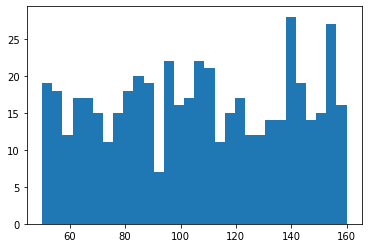

In [93]:
plt.hist(weight, bins = 30)

In [94]:
listOfSeries = [pd.Series(['Male', 205, 460],index = height_weight_data.columns),
                pd.Series(['Female', 202, 390],index = height_weight_data.columns),
                pd.Series(['Female', 199, 410],index = height_weight_data.columns),
                pd.Series(['Male', 202, 390],index = height_weight_data.columns),
                pd.Series(['Female', 199, 410],index = height_weight_data.columns),
                pd.Series(['Male', 200, 490],index = height_weight_data.columns)]

In [96]:
height_weight_updated = height_weight_data.append(listOfSeries,ignore_index = True)
height_weight_updated

,Gender,Height,Weight
0,Male,174,96
1,Male,189,87
2,Female,185,110
3,Female,195,104
4,Male,149,61
...,...,...,...
501,Female,202,390
502,Female,199,410
503,Male,202,390
504,Female,199,410


In [98]:
updated_weight_mean = height_weight_updated[('Weight')].mean()
updated_weight_median = height_weight_updated[('Weight')].median()

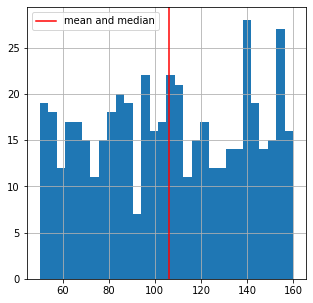

In [90]:
plt.figure(figsize=(5,5))
height_weight_data['Weight'].hist(bins = 30)
plt.axvline(weight_mean,label = 'mean and median', color = 'r')
# plt.axvline(weight_mode,label = 'mean', color='b')
plt.legend()

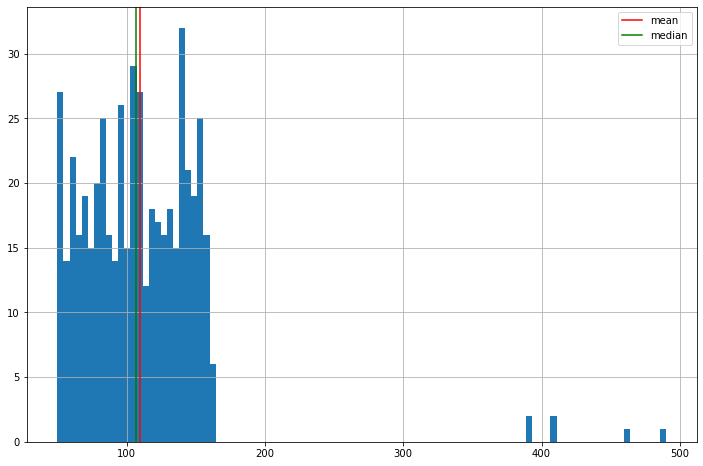

In [107]:
plt.figure(figsize=(12,8))
height_weight_updated['Weight'].hist(bins = 100)
plt.axvline(updated_weight_mean, color = 'r', label = 'mean')
plt.axvline(updated_weight_median, color = 'g', label = 'median')
plt.legend()

In [116]:
height_counts = {}
for p in height_weight_data['Height']:
    if p not in height_counts:
        height_counts[p] = 1
    else:
        height_counts[p] += 1

In [158]:
x_range = range(len(height_counts))

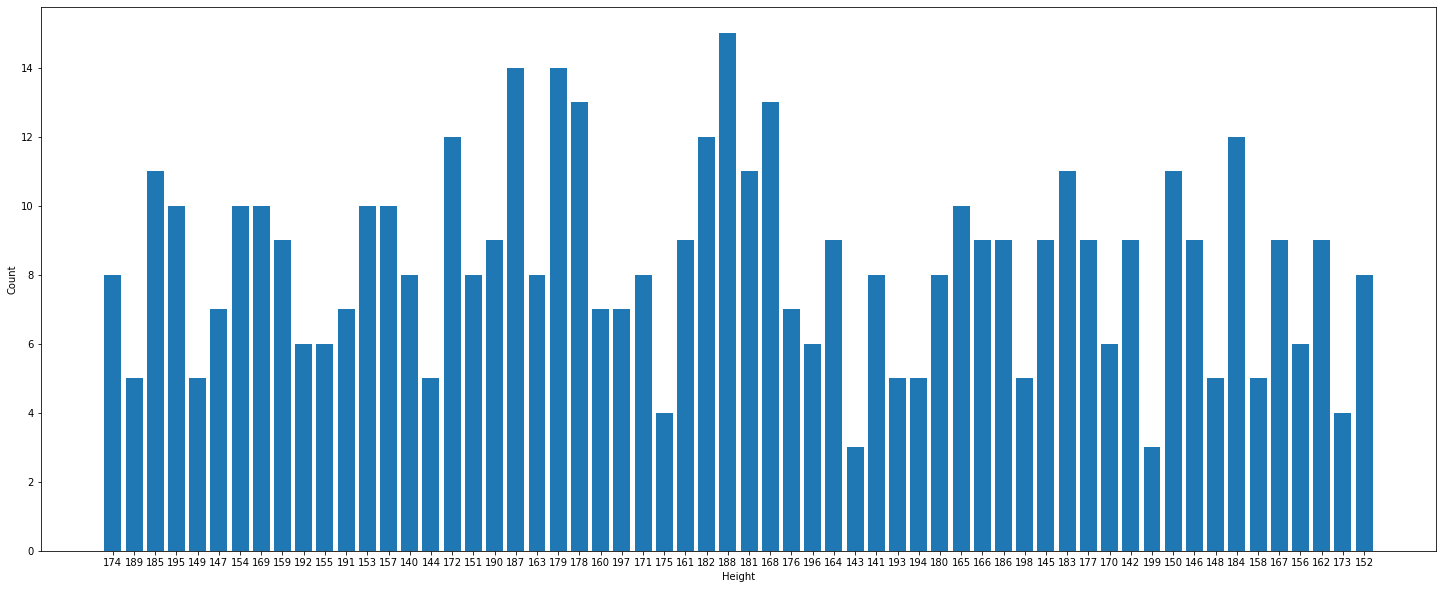

In [166]:
plt.figure(figsize=(25,10))
plt.bar(x_range, height_counts.values())
plt.xticks(x_range,height_counts.keys())
plt.xlabel('Height')
plt.ylabel('Count')
plt.show()



In [217]:
height_weight_data.shape
num_records = height_weight_data.shape[0]

In [232]:
height_data = height_weight_data[['Height']].copy()
weight_data = height_weight_data[['Weight']].copy()

In [233]:
counts = [1] * num_records
height_data['counts_height'] = counts
weight_data['counts_weight'] = counts

height_data = height_data.sort_values('Height')
weight_data = weight_data.sort_values('Weight')

In [227]:
height_data = height_data.groupby('Height',as_index = False).count()
height_data.head(10)
height_data['cumcounts_height'] = height_data['counts_height'].cumsum()
height_data.head(10)

,Height,counts_height,cumcounts_height
0,140,8,8
1,141,8,16
2,142,9,25
3,143,3,28
4,144,5,33
5,145,9,42
6,146,9,51
7,147,7,58
8,148,5,63
9,149,5,68


In [234]:
weight_data = weight_data.groupby('Weight', as_index = False).count()
weight_data['cumcounts_weight'] = weight_data['counts_weight'].cumsum()
weight_data.head(10)

,Weight,counts_weight,cumcounts_weight
0,50,9,9
1,51,4,13
2,52,5,18
3,53,1,19
4,54,8,27
5,55,1,28
6,56,4,32
7,57,5,37
8,58,4,41
9,59,3,44


In [236]:
q1_height = height_weight_data['Height'].quantile(0.25)
q3_height = height_weight_data['Height'].quantile(0.75)
iqr = q3_height - q1_height
print('q1 is ',q1_height, ' q2 is ', q3_height, ' so iqr is ', iqr)

q1 is  156.0  q2 is  184.0  so iqr is  28.0


In [245]:
q1_weight = height_weight_data['Weight'].quantile(0.25)
q3_weight = height_weight_data['Weight'].quantile(0.75)
iqr = q3_height - q1_height

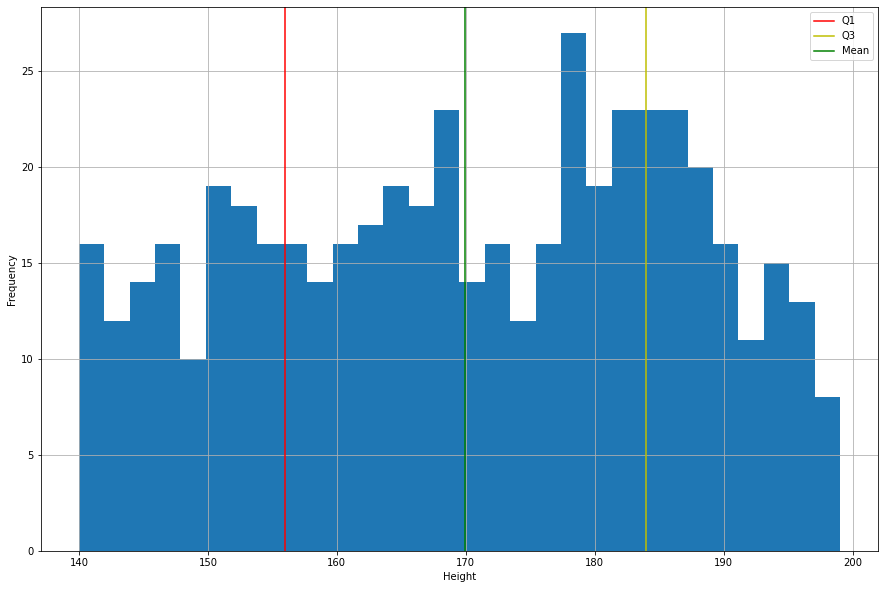

In [244]:
plt.figure(figsize=(15,10))
height_weight_data['Height'].hist(bins = 30)
plt.axvline(q1_height, color = 'r', label = 'Q1')
plt.axvline(q3_height, color = 'y', label = 'Q3')
plt.axvline(height_weight_data['Height'].mean(), color = 'g', label = 'Mean')
plt.xlabel('Height')
plt.ylabel('Frequency')

plt.legend()

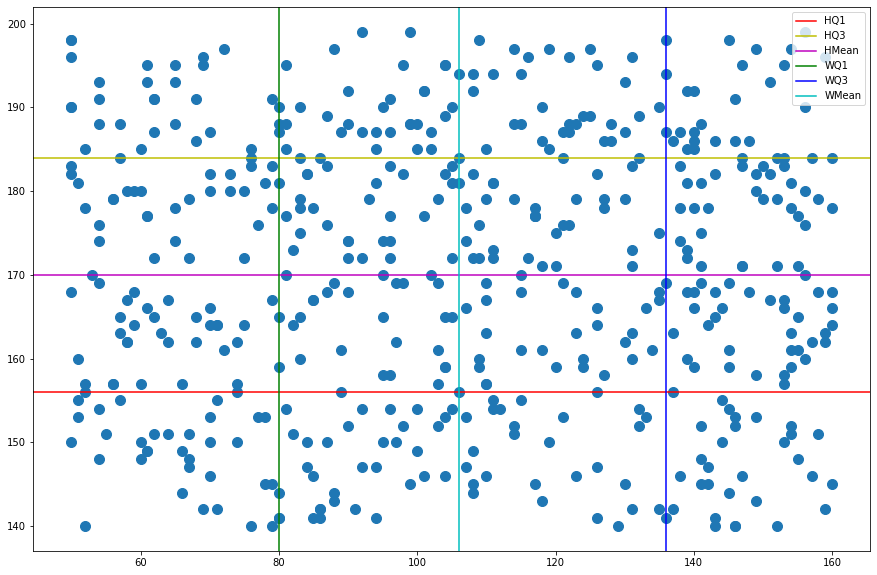

In [254]:
plt.figure(figsize=(15,10))

plt.scatter(height_weight_data['Weight'],height_weight_data['Height'],s= 100)
plt.axhline(q1_height, color = 'r', label = 'HQ1')
plt.axhline(q3_height, color = 'y', label = 'HQ3')
plt.axhline(height_weight_data['Height'].mean(), color = 'm', label = 'HMean')

plt.axvline(q1_weight, color = 'g', label = 'WQ1')
plt.axvline(q3_weight, color = 'b', label = 'WQ3')
plt.axvline(height_weight_data['Weight'].mean(), color = 'c', label = 'WMean')

plt.legend()

#### Calculating Variance and Std. Deviation

In [255]:
#use .var() function

height_weight_data['Height'].var()

268.1491623246496

In [256]:
#use .std() function

height_weight_data['Height'].std()

16.37526067959376

In [258]:
weight_mean = height_weight_data['Weight'].mean()
weight_std = height_weight_data['Weight'].std()

## Working with Stats with SciPy and StatsModel

In [260]:
os.getcwd()

'C:\\Users\\sdeshpande1\\Documents\\Stats\\datasets'